ĐỒ ÁN MÔN HỌC : PTDL PYTHON

THỐNG KÊ MÔ TẢ

In [37]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

plt.figure(figsize=(20,20))
%matplotlib inline

In [38]:
data = pd.read_csv('Inc_Exp_Data.csv')

In [39]:
data.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [40]:
# Xem thông tin dữ liệu trong df:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [41]:
Type = []
for x in data['Mthly_HH_Income']:
    if x <= 20000:
        Type.append('Thấp')
    elif 20000 < x <= 50000:
        Type.append('Trung Bình')
    elif 50000 < x <= 80000:
        Type.append('Cao')
    else:
        Type.append('Rất cao')

data.insert(7, "Type_Income", Type)
data.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income
0,5000,8000,3,2000,64200,Under-Graduate,1,Thấp
1,6000,7000,2,3000,79920,Illiterate,1,Thấp
2,10000,4500,2,0,112800,Under-Graduate,1,Thấp
3,10000,2000,1,0,97200,Illiterate,1,Thấp
4,12500,12000,2,3000,147000,Graduate,1,Thấp
5,14000,8000,2,0,196560,Graduate,1,Thấp
6,15000,16000,3,35000,167400,Post-Graduate,1,Thấp
7,18000,20000,5,8000,216000,Graduate,1,Thấp
8,19000,9000,2,0,218880,Under-Graduate,1,Thấp
9,20000,9000,4,0,220800,Under-Graduate,2,Thấp


In [42]:
#Bảng thông kê phần trăm thu nhập theo các mức trên

TN = data.groupby('Type_Income')['Type_Income'].count()
TN = pd.DataFrame(TN)
TN.columns = ['%']
phan_tram = (TN/sum(TN['%']))*100
phan_tram

,%
Type_Income,
Cao,14.0
Rất cao,12.0
Thấp,22.0
Trung Bình,52.0


Text(0, 0.5, 'Phần trăm')

<Figure size 576x576 with 0 Axes>

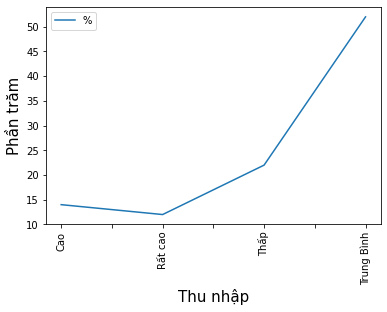

In [43]:
plt.figure(figsize=(8, 8))
phan_tram.plot()
plt.xticks(rotation =90, fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Thu nhập', fontsize=15)
plt.ylabel('Phần trăm', fontsize=15)    

In [46]:
type_expense = []

for x in data['Mthly_HH_Expense']:
    if x <= 8000:
        type_expense.append('Thấp')
    elif x <= 20000:
        type_expense.append('Trung bình')
    elif x <= 40000:
        type_expense.append('Cao')
    else:
        type_expense.append('Rất cao')
data.insert(8, "Type_Expense", type_expense)
data.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income,Type_Expense
0,5000,8000,3,2000,64200,Under-Graduate,1,Thấp,Thấp
1,6000,7000,2,3000,79920,Illiterate,1,Thấp,Thấp
2,10000,4500,2,0,112800,Under-Graduate,1,Thấp,Thấp
3,10000,2000,1,0,97200,Illiterate,1,Thấp,Thấp
4,12500,12000,2,3000,147000,Graduate,1,Thấp,Trung bình
5,14000,8000,2,0,196560,Graduate,1,Thấp,Thấp
6,15000,16000,3,35000,167400,Post-Graduate,1,Thấp,Trung bình
7,18000,20000,5,8000,216000,Graduate,1,Thấp,Trung bình
8,19000,9000,2,0,218880,Under-Graduate,1,Thấp,Trung bình
9,20000,9000,4,0,220800,Under-Graduate,2,Thấp,Trung bình


In [47]:
# Bảng thống kê phần trăm chi tiêu ứng với các mức thu nhập

CT = data.groupby('Type_Expense')['Type_Expense'].count()
CT = pd.DataFrame(CT)
CT.columns = ['%']
phan_tram_chi_tieu = (CT/sum(CT['%']))*100
phan_tram_chi_tieu

,%
Type_Expense,
Cao,24.0
Rất cao,8.0
Thấp,16.0
Trung bình,52.0


Text(0, 0.5, 'Phần trăm')

<Figure size 576x576 with 0 Axes>

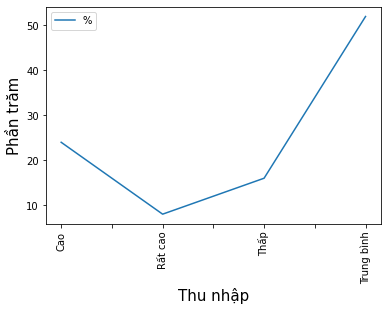

In [48]:
plt.figure(figsize=(8, 8))
phan_tram_chi_tieu.plot()
plt.xticks(rotation =90, fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Thu nhập', fontsize=15)
plt.ylabel('Phần trăm', fontsize=15)    

In [49]:
# Bảng thống kê tỉ lệ trình độ học vấn cao nhất

x = data.groupby('Highest_Qualified_Member')['Highest_Qualified_Member'].count()
x = pd.DataFrame(x)
x.columns = ['%']
Highest_Qualified_Member = x/sum(x['%'])*100
Highest_Qualified_Member

,%
Highest_Qualified_Member,
Graduate,38.0
Illiterate,10.0
Post-Graduate,12.0
Professional,20.0
Under-Graduate,20.0


Text(0, 0.5, 'Phần trăm')

<Figure size 576x576 with 0 Axes>

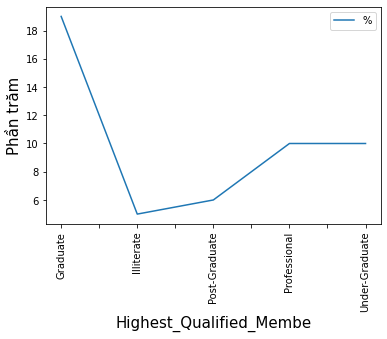

In [50]:
plt.figure(figsize=(8, 8))
x.plot()
plt.xticks(rotation =90, fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Highest_Qualified_Membe', fontsize=15)
plt.ylabel('Phần trăm', fontsize=15)    

In [51]:
#Bảng thống kê số người trong gia đình:

fml = data.groupby('No_of_Fly_Members')['No_of_Fly_Members'].count()
fml = pd.DataFrame(fml)
fml.columns = ['%']
fml = fml/sum(fml['%'])*100
fml

,%
No_of_Fly_Members,
1,2.0
2,16.0
3,18.0
4,30.0
5,10.0
6,20.0
7,4.0


In [53]:
#Bảng thống kê chi phí nộp thêm hằng năm

cphn = data.groupby('Emi_or_Rent_Amt')['Emi_or_Rent_Amt'].count()
cphn = pd.DataFrame(cphn)
cphn.columns = ['%']
cphn = cphn/sum(cphn['%'])*100
cphn

,%
Emi_or_Rent_Amt,
0,60.0
1000,2.0
2000,4.0
2500,2.0
3000,4.0
3500,6.0
4000,2.0
5000,4.0
8000,4.0


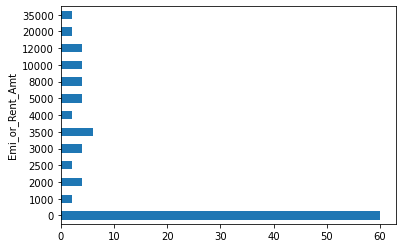

In [55]:
cphn['%'].plot(x="Emi_or_Rent_Amt",y="%",kind="barh") 

In [56]:
#Bảng thống kê thu nhập hằng năm

TNHN = data['Annual_HH_Income']
TNHN.head(10)

0     64200
1     79920
2    112800
3     97200
4    147000
5    196560
6    167400
7    216000
8    218880
9    220800
Name: Annual_HH_Income, dtype: int64

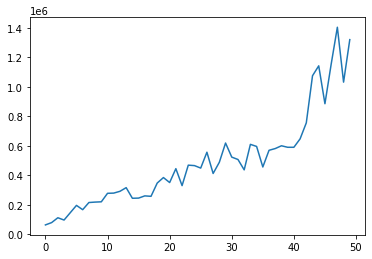

In [57]:
TNHN.plot(x = '', y = 'Annual_HH_Income',kind = 'line')

In [58]:
#Bảng thống kê người kiếm ra tiền

NKRT = data.groupby('No_of_Earning_Members')['No_of_Earning_Members'].count()
NKRT = pd.DataFrame(NKRT)
NKRT.columns = ['%']
NKRT = NKRT/sum(NKRT['%'])*100
NKRT

,%
No_of_Earning_Members,
1,66.0
2,24.0
3,8.0
4,2.0


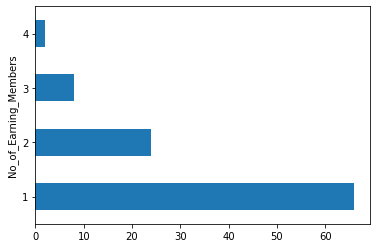

In [62]:
NKRT['%'].plot(x="No_of_Earning_Members",y="%",kind="barh")

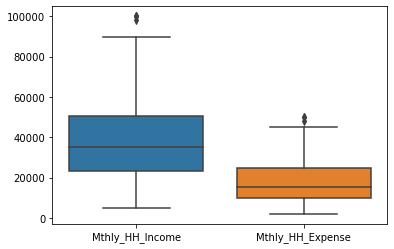

In [64]:
# boxplot so sánh thu chi hằng tháng

sns.boxplot(data=data[['Mthly_HH_Income','Mthly_HH_Expense']])

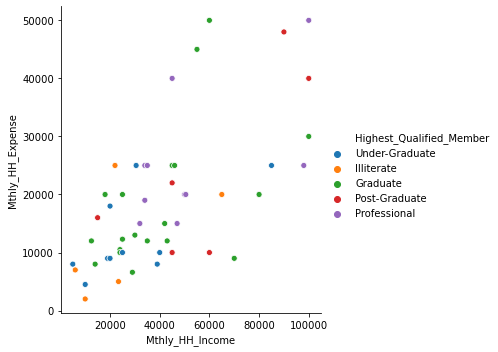

In [65]:
#Thống kê về chi tiêu hằng tháng so với trình độ học vấn

sns.relplot(data=data, x="Mthly_HH_Income", y="Mthly_HH_Expense", hue='Highest_Qualified_Member',kind='scatter')

Xu hướng tập trung của dữ liệu

In [73]:
# Sử dụng hàm describe
data.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [75]:
# Tính trung vị của các cột

print("Trung vị của data:")
pd.DataFrame(data.median())

Trung vị của data:


,0
Mthly_HH_Income,35000.0
Mthly_HH_Expense,15500.0
No_of_Fly_Members,4.0
Emi_or_Rent_Amt,0.0
Annual_HH_Income,447420.0
No_of_Earning_Members,1.0


In [74]:
# Tính trung bình các cột 

print("Giá trị trung bình của data:")
pd.DataFrame(data.mean())

Giá trị trung bình của data:


,0
Mthly_HH_Income,41558.00
Mthly_HH_Expense,18818.00
No_of_Fly_Members,4.06
Emi_or_Rent_Amt,3060.00
Annual_HH_Income,490019.04
No_of_Earning_Members,1.46


In [76]:
# Tìm mode

print("Yếu vị của data:")
pd.DataFrame(data.mode(dropna = True)).T

Yếu vị của data:


,0
Mthly_HH_Income,45000
Mthly_HH_Expense,25000
No_of_Fly_Members,4
Emi_or_Rent_Amt,0
Annual_HH_Income,590400
Highest_Qualified_Member,Graduate
No_of_Earning_Members,1
Type_Income,Trung Bình
Type_Expense,Trung bình


Sự phân tán của dữ liệu

In [79]:
#tính min của từng cột

print('min của data:')
pd.DataFrame(data.min(skipna= True, numeric_only= True))

min của data:


,0
Mthly_HH_Income,5000
Mthly_HH_Expense,2000
No_of_Fly_Members,1
Emi_or_Rent_Amt,0
Annual_HH_Income,64200
No_of_Earning_Members,1


In [80]:
#tính max của từng cột

print('max của data:')
pd.DataFrame(data.max(skipna= True, numeric_only= True))

max của data:


,0
Mthly_HH_Income,100000
Mthly_HH_Expense,50000
No_of_Fly_Members,7
Emi_or_Rent_Amt,35000
Annual_HH_Income,1404000
No_of_Earning_Members,4


In [82]:
# Tính độ lệch chuẩn - standard deviation
print("Độ lệch chuẩn của data:")
pd.DataFrame(data.std(skipna = True))

Độ lệch chuẩn của data:


,0
Mthly_HH_Income,26097.908979
Mthly_HH_Expense,12090.216824
No_of_Fly_Members,1.517382
Emi_or_Rent_Amt,6241.434948
Annual_HH_Income,320135.792123
No_of_Earning_Members,0.734291


In [83]:
# Tính phương sai
print('Phương sai của data:')
pd.DataFrame(data.var(skipna = True))

Phương sai của data:


,0
Mthly_HH_Income,6.811009e+08
Mthly_HH_Expense,1.461733e+08
No_of_Fly_Members,2.302449e+00
Emi_or_Rent_Amt,3.895551e+07
Annual_HH_Income,1.024869e+11
No_of_Earning_Members,5.391837e-01


Text(0, 0.5, 'Count')

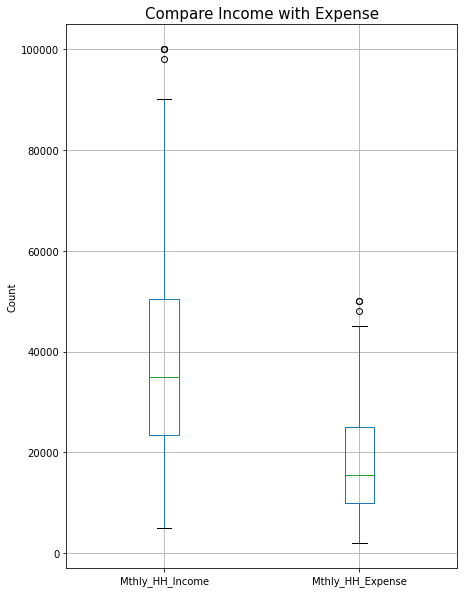

In [84]:
# Tương quan giữa thu nhập và chi tiêu hàng tháng


plt.figure(figsize=(7, 10))
plt.title('Compare Income with Expense', fontsize=15)
data[['Mthly_HH_Income', 'Mthly_HH_Expense']].boxplot()
plt.ylabel('Count')

Text(0, 0.5, 'Count')

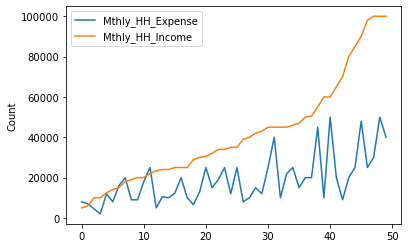

In [85]:
data[["Mthly_HH_Expense", "Mthly_HH_Income"]].plot()
plt.ylabel('Count')